In [1]:
# Import funROI

import sys
import os
package_path = "../funROI"
sys.path.append(os.path.abspath(package_path))
import funROI
from funROI import utils, first_level, analysis

from nilearn.plotting import plot_glass_brain

In [2]:
# Set the BIDS data directories
funROI.set_bids_data_folder("./data/bids")
funROI.set_bids_deriv_folder("./data/bids/derivatives")
funROI.set_bids_preprocessed_folder("./data/bids/derivatives/fmriprep")

/Users/ruimingao/Documents/funROI/funROI/analysis.py:284: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  overlap_table = pd.concat([overlap_table, pd.DataFrame({'img_1': self.img_labels[img1_i], 'img_2': self.img_labels[img2_i], 'ssroi_1': img1_label, 'ssroi_2': img2_label, 'n_voxels_1': np.sum(img1_mask), 'n_voxels_2': np.sum(img2_mask), 'intersection': intersection, 'overlap_ratio': overlap}, index=[0])], ignore_index=True)


<Axes: xlabel='name_2', ylabel='name_1'>

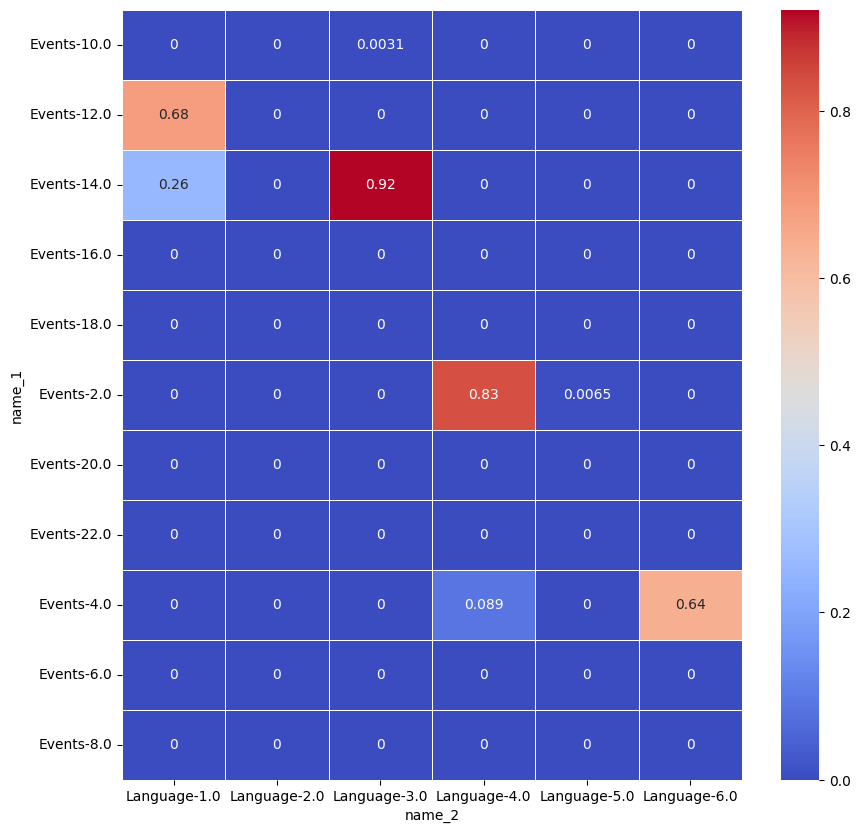

In [3]:
# Examine the overlap between networks
parcels_overlap_analyzer = analysis.OverlapAnalyzer()
parcels_overlap_analyzer.add_parcels("Events")
parcels_overlap_analyzer.add_parcels("Language")
df = parcels_overlap_analyzer.run()

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
import seaborn as sns
df['name_1'] = df[['img_1', 'ssroi_1']].astype(str).agg('-'.join, axis=1)
df['name_2'] = df[['img_2', 'ssroi_2']].astype(str).agg('-'.join, axis=1)
heatmap_data = df.groupby(['name_1', 'name_2'])['overlap_ratio'].mean().unstack()
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)

/Users/ruimingao/Documents/funROI/funROI/analysis.py:284: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  overlap_table = pd.concat([overlap_table, pd.DataFrame({'img_1': self.img_labels[img1_i], 'img_2': self.img_labels[img2_i], 'ssroi_1': img1_label, 'ssroi_2': img2_label, 'n_voxels_1': np.sum(img1_mask), 'n_voxels_2': np.sum(img2_mask), 'intersection': intersection, 'overlap_ratio': overlap}, index=[0])], ignore_index=True)


<Axes: xlabel='name_2', ylabel='name_1'>

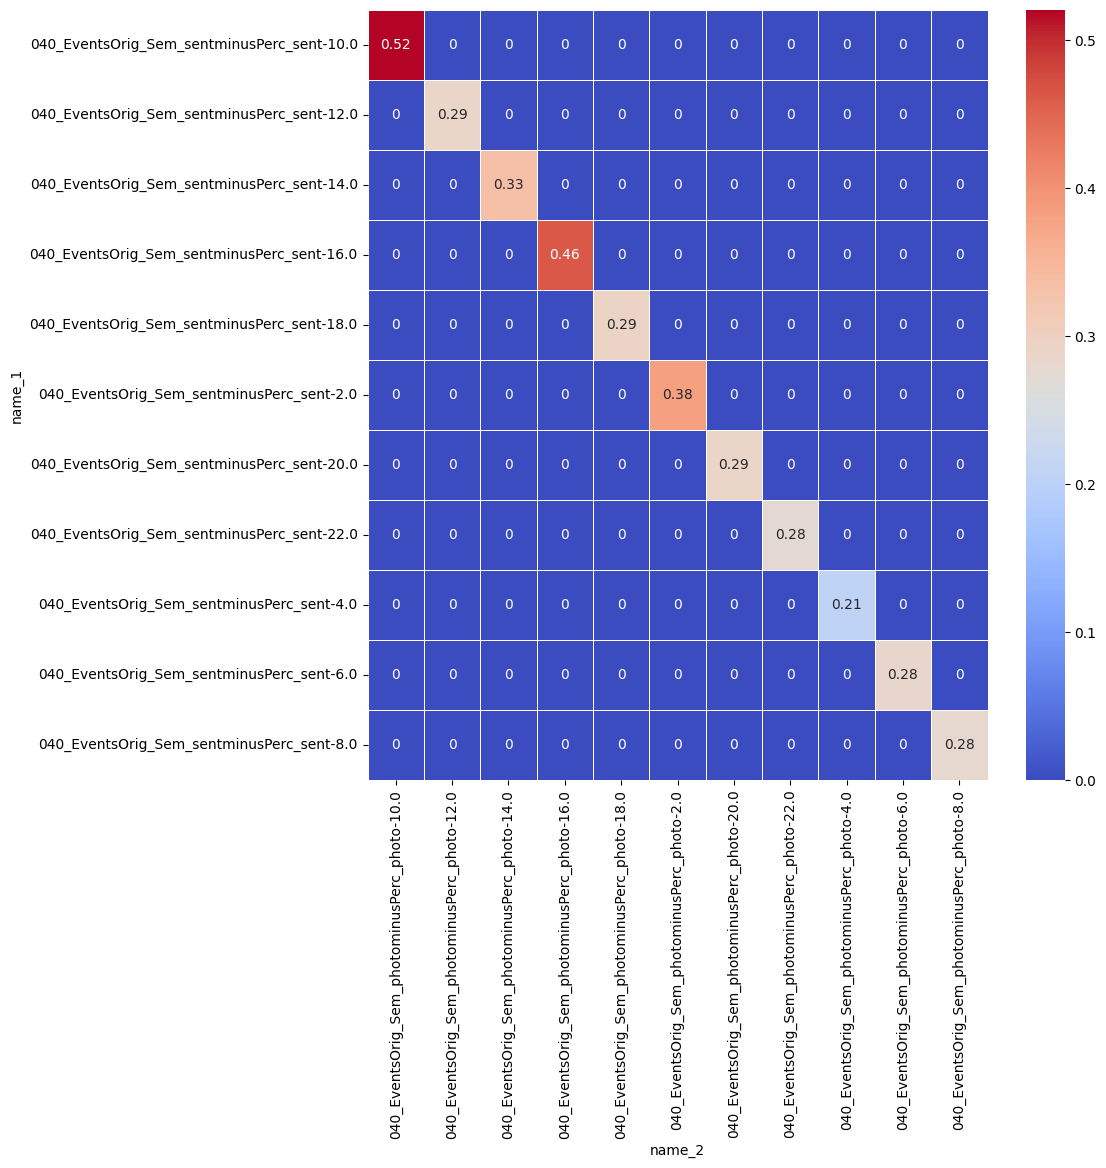

In [4]:
# Examine the overlap between ssROIs
ssroi_overlap_analyzer = analysis.OverlapAnalyzer()
ssroi_overlap_analyzer.add_ssroi(subject='040', task='EventsOrig', localizer='Sem_sentminusPerc_sent', threshold_type='percent', threshold_value=0.10, parcels_name='Events')
ssroi_overlap_analyzer.add_ssroi(subject='040', task='EventsOrig', localizer='Sem_photominusPerc_photo', threshold_type='percent', threshold_value=0.10, parcels_name='Events')
df = ssroi_overlap_analyzer.run()

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
import seaborn as sns
df['name_1'] = df[['img_1', 'ssroi_1']].astype(str).agg('-'.join, axis=1)
df['name_2'] = df[['img_2', 'ssroi_2']].astype(str).agg('-'.join, axis=1)
heatmap_data = df.groupby(['name_1', 'name_2'])['overlap_ratio'].mean().unstack()
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)